In [1]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\EdwardJansenADC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


'C:\\Users\\EdwardJansenADC\\.matplotlib'

# Multivariate Analysis

Logit 

Bootstrap

Lasso

Lasso & Bootstrap

Any other

In [3]:
import functions as fc

C:\Users\EdwardJansenADC\JupyterProjects\PD


### Load Data

In [4]:
df = pd.read_csv('data/randomisedData.csv')
cols = df.columns
numvars = cols[df.dtypes != 'object']
cats = cols[df.dtypes == 'object']

In [5]:
X_train, X_test, y_train, y_test = fc.split(df, 'target')
df = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

### Select vars here

In [ ]:
##



#### apply functions on train set

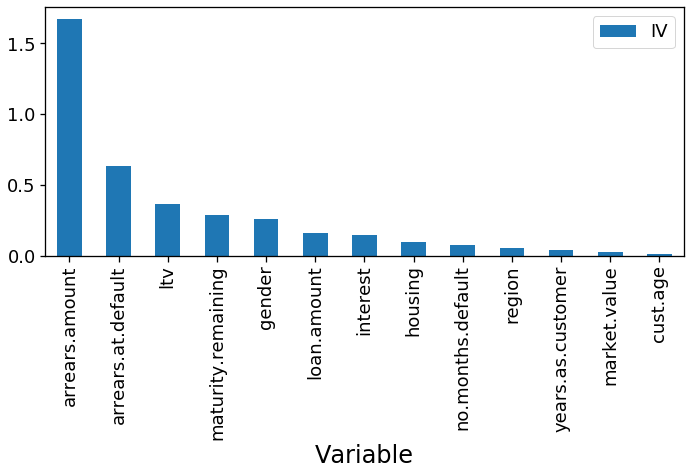

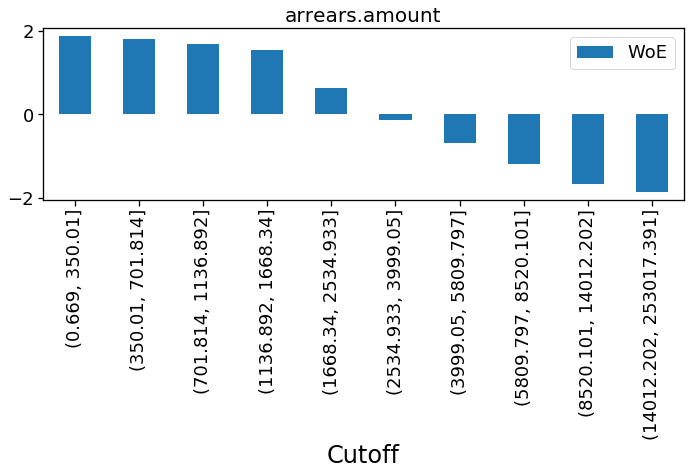

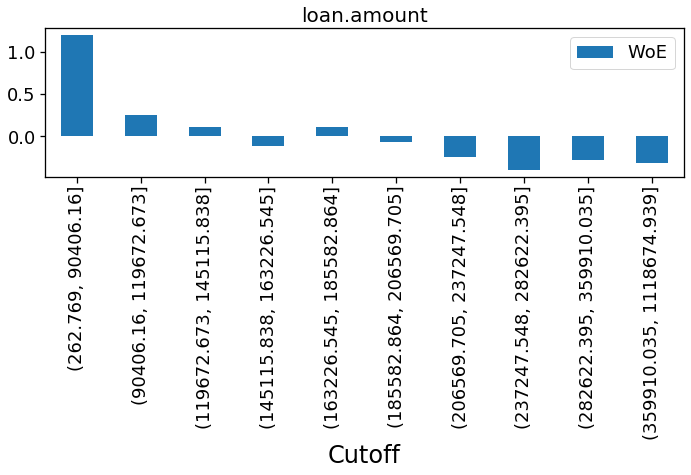

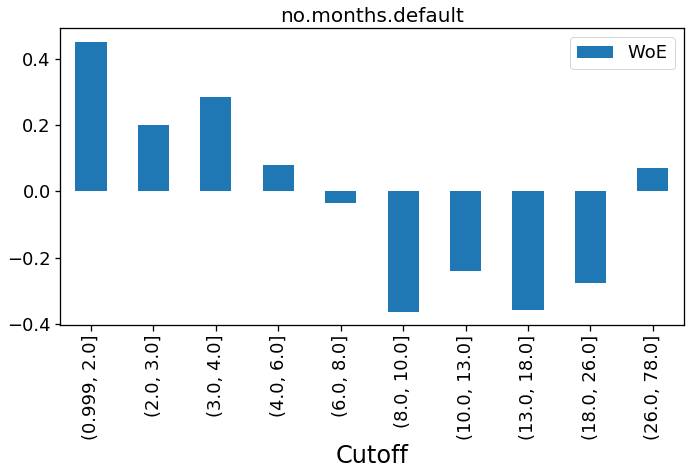

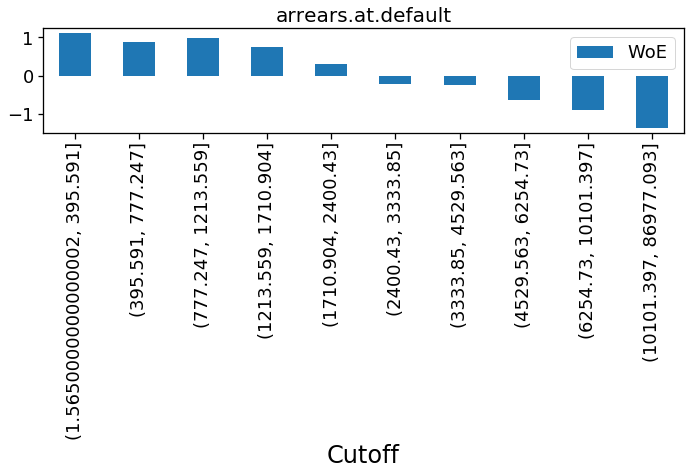

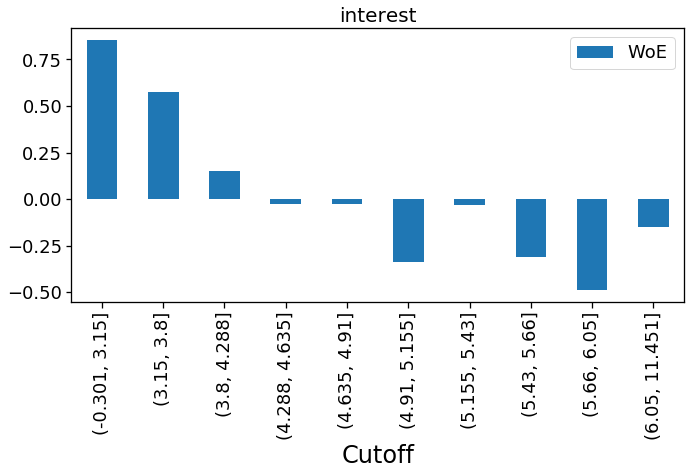

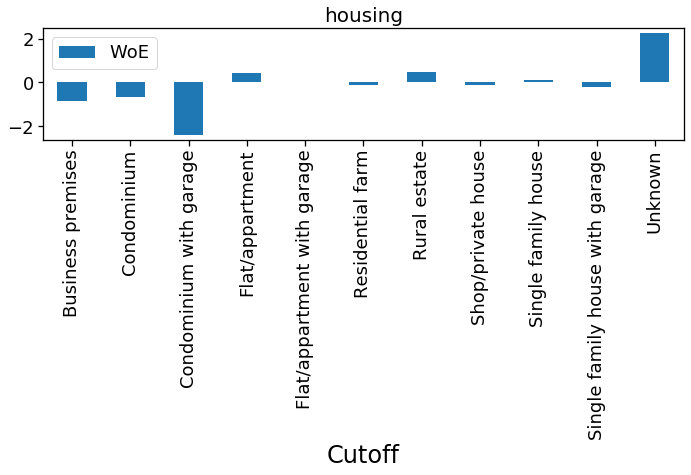

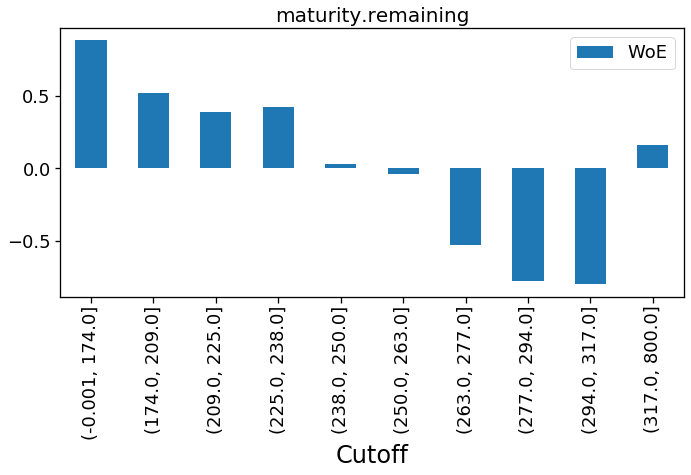

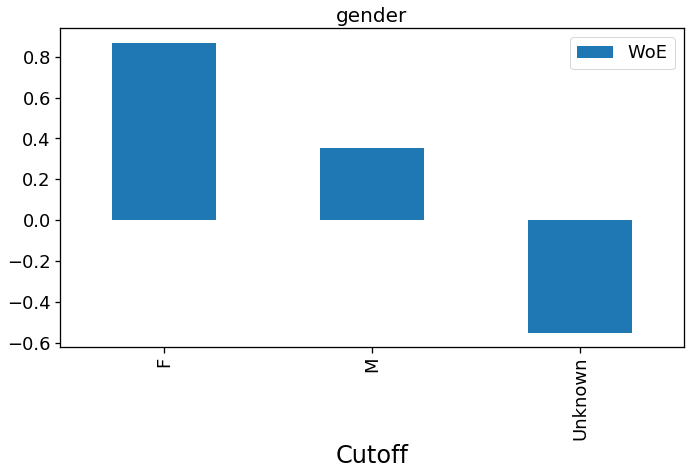

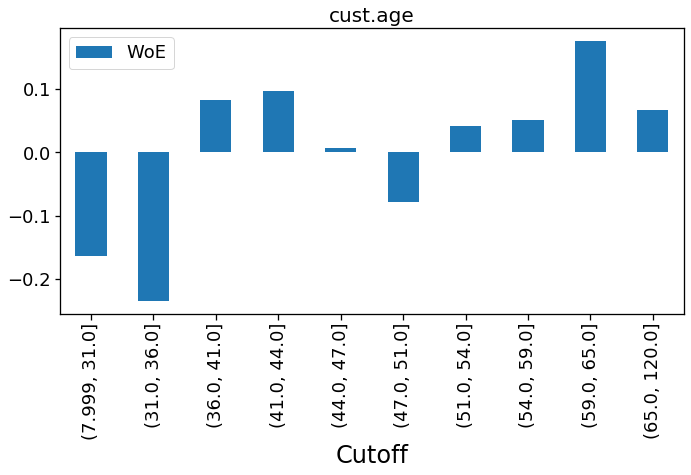

In [8]:
binned_df, bins, lbl = fc.binning(df, 'target', ['ID', 'period'], bins=10)
cols, d_lst, df_IV = fc.test_woe(binned_df, 'target', trend_visualize=True)
woe_df = fc.replace_woe(binned_df, d_lst, 'target')

#### apply functions on test set

In [11]:
df_test = df_test.drop(['ID', 'period'], axis=1)

In [12]:
binned_df_test = fc.binning_setbins(df_test, 'target', bins=bins, labels = lbl, correct_nan=True)
woe_df_test = fc.replace_woe(binned_df_test, d_lst, 'target')

In [13]:
X_train = woe_df.drop(['target'], axis=1)
X_test = woe_df_test.drop(['target'], axis=1)
y_train = woe_df['target']
y_test = woe_df_test['target']

## Classifier

In [15]:
def GS_clf(penalty = ['l1', 'l2'], C = np.logspace(-7, 7, 29), cv=5):
    """
    Function that sets up the GridSearch model with crossvalidation.
    ---------
    Input:

    Returns:
        clf         object; to be fitted classifier
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    # set up logistic regression
    lr = LogisticRegression(C=1)
    
    # define grid of hyper parameters
    param_grid = [
            {'penalty' : ['l1', 'l2'],
            'C' : np.logspace(-7, 7, 29),
            'solver' : ['liblinear']},
        ]    
    
    # initialize classifier
    clf = GridSearchCV(lr, param_grid, scoring = 'roc_auc', n_jobs=-1, iid =True, refit = True, 
                           cv=cv, verbose=True, error_score='raise')
    
    return clf


In [16]:
clf = GS_clf(cv=2)
clf.fit(X_train, y_train)

Fitting 2 folds for each of 58 candidates, totalling 116 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    5.6s finished


GridSearchCV(cv=2, error_score='raise',
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=True, n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-07, 3.16227766e...
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06, 3.16227766e+06,
       1

In [21]:
X_train.isnull().sum()

woe_arrears.amount        0
woe_loan.amount           0
woe_no.months.default     0
woe_arrears.at.default    0
woe_ltv                   0
woe_market.value          0
woe_interest              0
woe_region                0
woe_housing               0
woe_maturity.remaining    0
woe_gender                0
woe_cust.age              0
woe_years.as.customer     0
dtype: int64

In [17]:
pred_proba = clf.predict_proba(X_test)[:, 1]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
coef = clf.best_estimator_.coef_[0]
intercept = clf.best_estimator_.intercept_[0]

In [ ]:
print( 'Gini test: ' + str(fc.gini(y_test, pred_proba)) )

In [ ]:
scorecard = fc.scorecard(d_lst, cols, coef, intercept)
scorecard.to_csv('scorecard.csv')

score_data = fc.score_data(woe_df, coef, intercept, visualize=True)